**Day - 1: Explore Numpy and Pandas

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([1, 2, 4])
x

array([1, 2, 4])

In [3]:
#help(np.array)

In [4]:
y = np.array([[1, 2, 3, 4], 
             [5, 6, 7, 8]])

In [5]:
y

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [6]:
z = np.random.randn(50)

In [7]:
z

array([-2.04044931, -1.20121415, -0.9082197 , -0.57937999,  0.78856679,
        0.21291712, -1.06288684, -0.27205788,  0.14562737,  0.44544574,
       -0.67608259, -1.54959828,  0.29177705,  1.29002923,  0.9961723 ,
       -0.66951467,  0.52769897, -0.31581336, -1.19872566, -0.33612655,
        0.0769563 ,  0.08764994,  1.42422471, -0.27637173, -3.26509401,
        2.43978141, -0.91703017,  1.10994932, -1.77930168, -0.26544698,
       -1.74065529,  0.6294922 ,  0.45748766, -0.88239583,  0.97023496,
       -0.18426467,  0.37646996,  0.04852838, -0.12995764, -0.85227189,
       -0.48927322,  0.13712852,  1.66188743, -0.74002621, -0.18340727,
       -0.23196068,  0.14323733, -1.31864813, -1.9688522 ,  0.81500092])

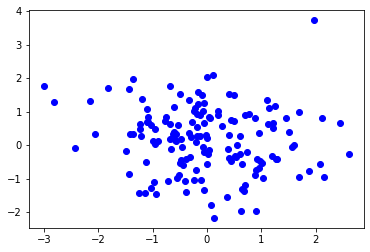

In [8]:
a = np.random.randn(150)
b = np.random.randn(150)
plt.plot(a, b, 'bo')
plt.show()

**Day - 2 - A: Manual Proof VS Sklearn's Linear Regression

In [9]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

In [10]:
X, y = load_boston(return_X_y = True)

In [11]:
# follow manual steps
# add columns of 1 because we are going to follow the manual proofing steps
X2 = np.c_[np.ones([506, 1]), X]

In [12]:
X2

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [13]:
# beta = inverse(XT * X) * XT * y
beta = np.linalg.multi_dot([
    np.linalg.inv(
        np.matmul(X2.T, X2)), 
    X2.T, y])

In [14]:
beta

array([ 3.64594884e+01, -1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
        2.68673382e+00, -1.77666112e+01,  3.80986521e+00,  6.92224640e-04,
       -1.47556685e+00,  3.06049479e-01, -1.23345939e-02, -9.52747232e-01,
        9.31168327e-03, -5.24758378e-01])

In [15]:
# using scikit learn
reg_model = LinearRegression()
reg_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# all beta values
reg_model.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [17]:
# beta 0 or y intercept
reg_model.intercept_

36.459488385089855

In [34]:
# using scikit learn and X matrix with 1 added
reg_model2 = LinearRegression()
reg_model2.fit(X2, y)
reg_model2.coef_

array([ 0.00000000e+00, -1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
        2.68673382e+00, -1.77666112e+01,  3.80986521e+00,  6.92224640e-04,
       -1.47556685e+00,  3.06049479e-01, -1.23345939e-02, -9.52747232e-01,
        9.31168327e-03, -5.24758378e-01])

In [35]:
reg_model.intercept_

36.459488385089855

**Day - 2 - B: Auto dataset**

In [65]:
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [19]:
auto = pd.read_csv("https://raw.githubusercontent.com/sibirbil/IMO2020/master/UygulamaDersleri/02_Dogrusal_Baglanim/Auto.csv",
                  index_col = "name")

In [20]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [21]:
auto["country"] = auto.origin.replace([1, 2, 3], 
                                      ['Americas', 'Europe', 'Japan'])

In [22]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,country
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,Americas
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,Americas
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,Americas
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,Americas
ford torino,17.0,8,302.0,140,3449,10.5,70,1,Americas


In [23]:
# check if any null values
auto.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
country         False
dtype: bool

In [24]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
country          object
dtype: object

In [25]:
auto.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [26]:
auto2 = auto[auto.horsepower != '?']

In [27]:
auto2.horsepower = auto2.horsepower.astype("int64")

/Users/cereniyim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [28]:
auto2.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
country          object
dtype: object

In [29]:
auto2.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


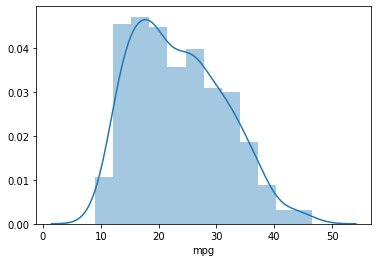

In [30]:
sns.distplot(auto2.mpg)

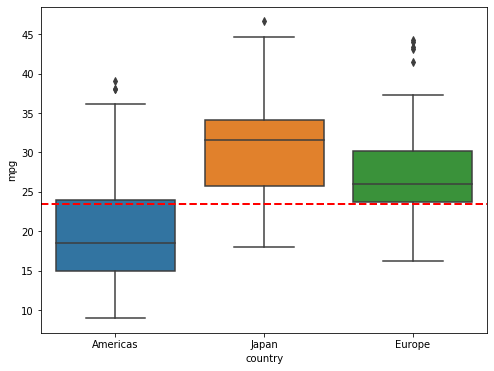

In [31]:
# visualize meter per gallon per country
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='country',
                  y="mpg",
                  data=auto2)
plt.axhline(auto2.mpg.mean(),
            color="r",
            linestyle="dashed",
            linewidth=2)

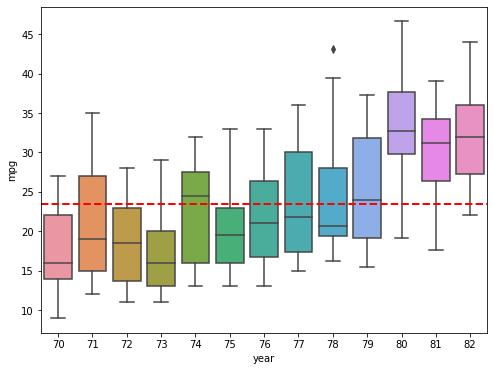

In [32]:
# visualize meter per gallon per year
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='year',
                  y="mpg",
                  data=auto2)
plt.axhline(auto2.mpg.mean(),
            color="r",
            linestyle="dashed",
            linewidth=2)

In [39]:
# model from statsmodels
X_horsepower = auto2["horsepower"]
X_horsepower = sm.add_constant(X_horsepower)
y = auto2["mpg"]

/Users/cereniyim/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [40]:
# statsmodel linear model and model's summary
sm_reg_model = sm.regression.linear_model.OLS(y, X_horsepower)
fit = sm_reg_model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           7.03e-81
Time:                        14:50:08   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
prediction = fit.get_prediction([1, 98])
prediction.predicted_mean

array([24.46707715])

In [43]:
# 95 percent confidcence interval of this prediction
prediction.summary_frame(alpha = 0.005)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.757739,25.176415,10.5995,38.334654


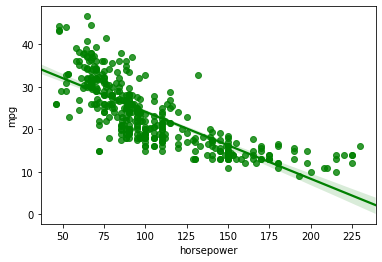

In [46]:
ax = sns.regplot(x="horsepower", y="mpg", data=auto2, color="g")

In [55]:
# try to use this library
import tools as t

In [56]:
#t.plots(fit, 'mpg', auto2)

AttributeError: module 'tools' has no attribute 'plots'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c24633dd0>,
      dtype=object)

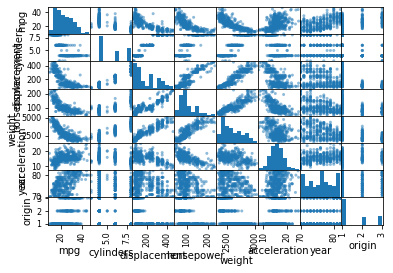

In [57]:
pd.plotting.scatter_matrix(auto2)

In [58]:
auto2.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [61]:
X_all = pd.DataFrame(auto2.iloc[:,1:8])
X_all = sm.add_constant(X_all)

In [63]:
all_reg_model = sm.regression.linear_model.OLS(y, X_all)
all_fit = all_reg_model.fit()
all_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 28 Jan 2020   Prob (F-statistic):          2.04e-139
Time:                        15:18:31   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
# how model performs with new features
model = smf.ols(formula = "mpg ~ horsepower + weight + horsepower*weight", 
                data = auto2)
last_fit = model.fit()
last_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     384.8
Date:                Tue, 28 Jan 2020   Prob (F-statistic):          7.26e-116
Time:                        15:33:23   Log-Likelihood:                -1090.7
No. Observations:                 392   AIC:                             2189.
Df Residuals:                     388   BIC:                             2205.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            63.5579      2.343     27.127      0.000      58.951      68.164
horsepower           -0.2508      0.027     -9.195      0.000      -0.304      -0.197
weight               -0.0108      0.001    -13.921      0.000      -0.012      -0.009
horsepower:weight  5.355e-05   6.65e-06      8.054      0.000    4.05e-05    6.66e-05
==============================================================================
Omnibus:                       34.175   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.522
Skew:                           0.577   Prob(JB):                     1.45e-12
Kurtosis:                       4.417   Cond. No.                     4.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
# what if we transform existing features
auto2["horsepower2"] = auto2["horsepower"]**2
model_2 = smf.ols(formula = "mpg ~ horsepower + horsepower2", 
                data = auto2)
last_fit_2 = model_2.fit()
last_fit_2.summary()

/Users/cereniyim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           5.40e-99
Time:                        15:39:47   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      56.9001      1.800     31.604      0.000      53.360      60.440
horsepower     -0.4662      0.031    -14.978      0.000      -0.527      -0.405
horsepower2     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""